In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values

In [3]:
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [4]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [5]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


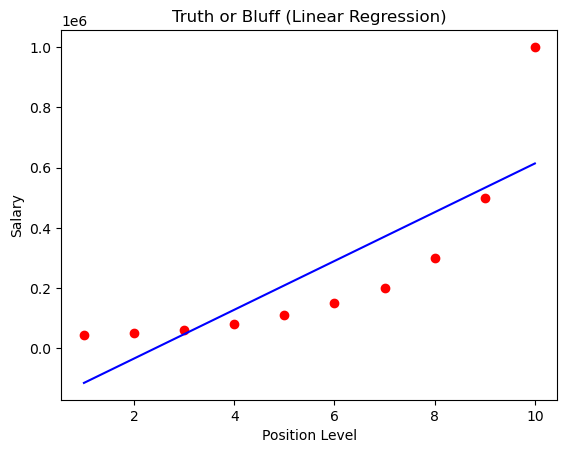

In [6]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

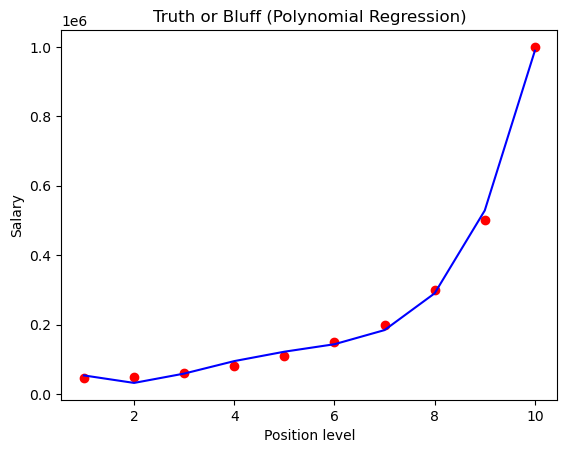

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_23104\3029784565.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


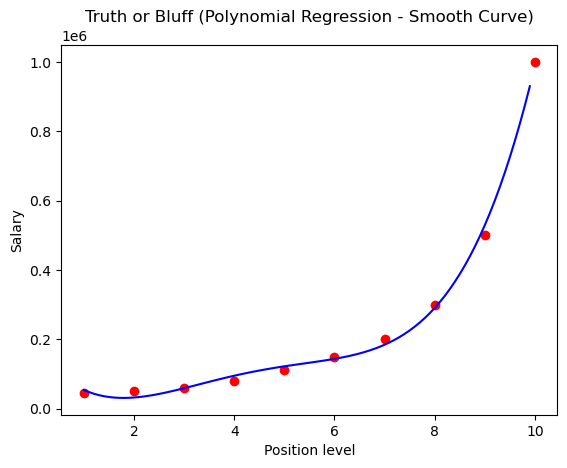

In [8]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [9]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)

Linear Regression Prediction for Level 6.5: [330378.78787879]


In [10]:
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)

Polynomial Regression Prediction for Level 6.5: [158862.45265153]


In [11]:
# Import required model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 26695878787.878788
R² Score: 0.6690412331929895


## Car Price Dataset

### Task 1 — Load the dataset and identify relevant columns

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# View first rows
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Check column names
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


### Task 2 — Select Engine Size as input and Price as output

In [5]:
X = df[['enginesize']]   # Input feature
y = df['price']          # Output variable

### Task 3 — Visualize the relationship between engine size and price

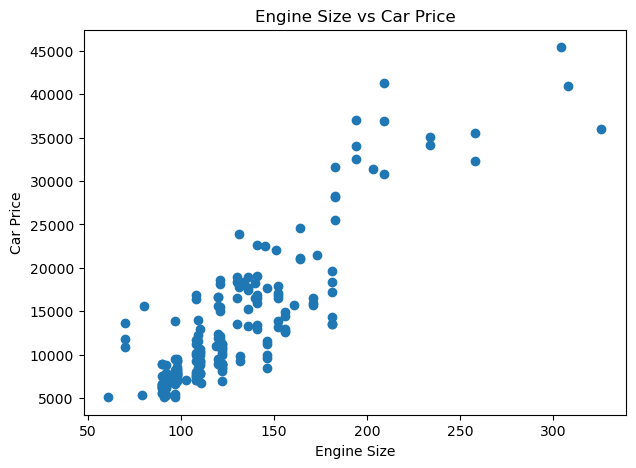

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


### Task 4 — Build a predictive model

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Polynomial feature transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Train model
lin_model = LinearRegression()
lin_model.fit(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

print("Polynomial Regression model trained successfully")


Polynomial Regression model trained successfully


### Task 5 — Predict the price for Engine Size = 200

In [ ]:
import numpy as np

engine_size = np.array([[200]])
engine_size_poly = poly.transform(engine_size)

predicted_price = model.predict(engine_size_poly)

print("Predicted Car Price for Engine Size 200:", predicted_price[0])

Predicted Car Price for Engine Size 200: 25565.170876042997


c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Business Interpretation

The model captures the non-linear effect of engine size on price.

Medium engine sizes show rapid price growth, while very large engines exhibit saturation, aligning with luxury market behavior.

### Task 6 — Increase model flexibility (Curved model)

In [38]:
# Increasing model flexibility
poly_deg_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_deg_3.fit_transform(X)

poly_deg_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_deg_4.fit_transform(X)

model_deg_3 = LinearRegression().fit(X_poly_3, y)
model_deg_4 = LinearRegression().fit(X_poly_4, y)

c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


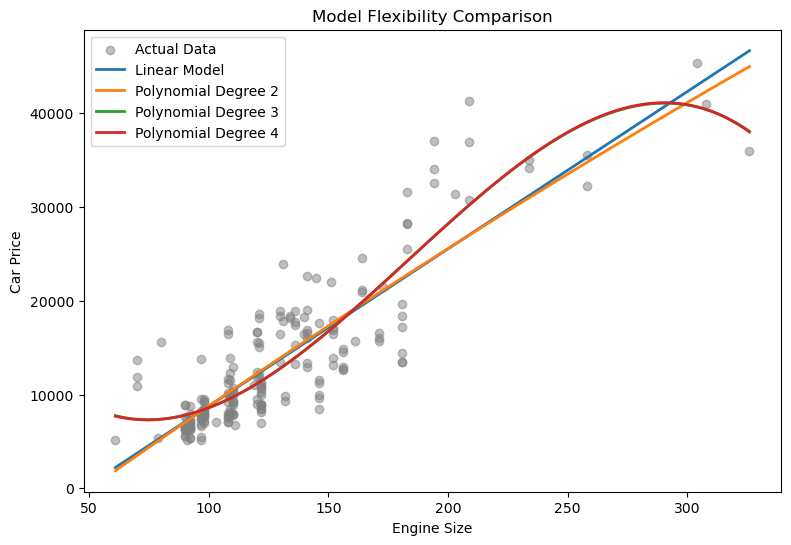

In [39]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.figure(figsize=(9,6))

# Actual data
plt.scatter(X, y, color='gray', alpha=0.5, label='Actual Data')

# Linear model
plt.plot(X_range,lin_model.predict(X_range),label='Linear Model',linewidth=2)

# Polynomial degree 2 (your "model")
plt.plot(X_range,model.predict(poly.transform(X_range)),label='Polynomial Degree 2',linewidth=2)

# Polynomial degree 3
plt.plot(X_range,model_deg_3.predict(poly_deg_3.transform(X_range)),label='Polynomial Degree 3',linewidth=2)

# Polynomial degree 4
plt.plot(X_range,model_deg_4.predict(poly_deg_4.transform(X_range)),label='Polynomial Degree 4',linewidth=2)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Model Flexibility Comparison")
plt.legend()
plt.show()



### Task 7 — Predict price for Engine Size = 200 (Curved Model)

In [32]:
engine_200 = [[200]]

linear_pred = lin_reg.predict(engine_200)
poly2_pred = lin_reg_2.predict(poly_reg.transform(engine_200))
poly3_pred = model_deg_3.predict(poly_deg_3.transform(engine_200))

print("Linear Prediction:", linear_pred)
print("Polynomial Degree 2 Prediction:", poly2_pred)
print("Polynomial Degree 3 Prediction:", poly3_pred)

Linear Prediction: [15980424.24242424]
Polynomial Degree 2 Prediction: [1.30428473e+12]
Polynomial Degree 3 Prediction: [28207.4516369]


c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Observation

Linear model → underestimates mid-range engines

Degree 2 → smooth realistic growth

Higher degree → unstable swings at extremes

### Task 8 — Evaluate Prediction Errors

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear": lin_reg.fit(X_train, y_train),
    "Poly Degree 2": lin_reg_2.fit(poly_reg.fit_transform(X_train), y_train),
    "Poly Degree 3": model_deg_3.fit(poly_deg_3.fit_transform(X_train), y_train)
}

for name, model in models.items():
    if "Poly" in name:
        X_test_transformed = poly_reg.transform(X_test) if "2" in name else poly_deg_3.transform(X_test)
    else:
        X_test_transformed = X_test
        
    y_pred = model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} → MSE: {mse:.2f}, R²: {r2:.2f}")

Linear → MSE: 15637882.19, R²: 0.80
Poly Degree 2 → MSE: 11927087.92, R²: 0.85
Poly Degree 3 → MSE: 12270546.90, R²: 0.84


### Business Interpretation of Errors 
Linear -> Misses curvature → pricing errors in mid-range

Poly Degree 2 -> Balanced → captures trend with low error

Poly Degree 3+ -> Risk of overfitting luxury cars
#### Business Impact:
Overpricing → lost customers

Underpricing → revenue loss

#### Why does a straight-line model fail here?
It assumes a constant price increase, but car prices grow non-linearly with engine size due to market demand and luxury saturation.

#### What risk occurs if the curve becomes too flexible?
An overly flexible curve overfits the data, capturing noise and giving unreliable predictions for new cars.

#### Which model would you recommend for production and why?
A polynomial regression (degree 2) model, because it captures the real trend accurately while remaining stable and interpretable.

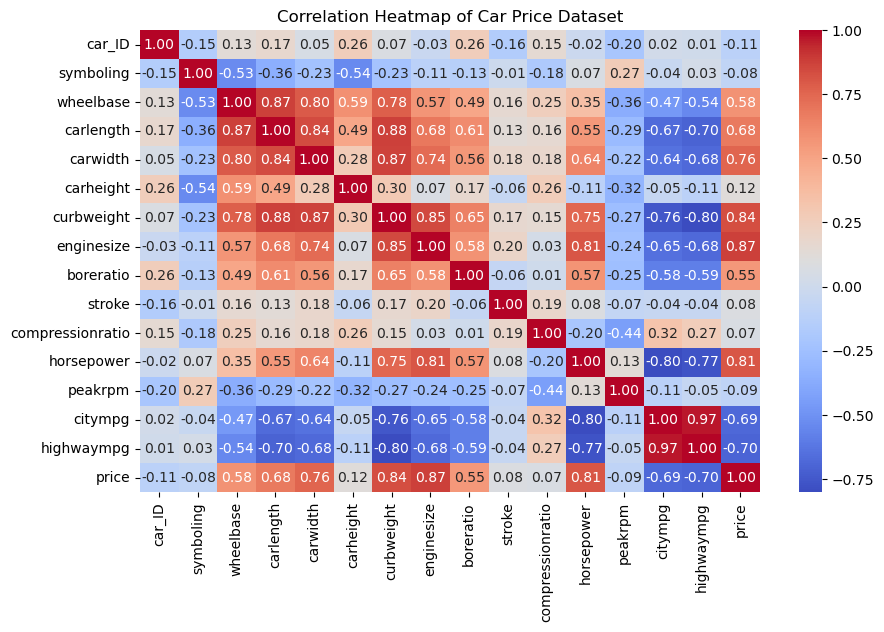

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()


### Insights

target -> price

symboling -> -0.08 - strong negative

wheelbase -> 0.58 - moderate positive

carlength -> 0.68 - moderate positive

carwidth -> 0.76 - strong positive

carheight -> 0.12 - weak positive

curbweight -> 0.84 - strong positive

enginesize -> 0.87 - strong positive

boreratio -> 0.55 - moderate positive

stroke -> 0.079 - weak positive

compressionratio -> 0.068 - weak positive

horsepower -> 0.81 - strong positive

peakrpm -> -0.085 - weak negative

citympg -> -0.69 - moderate negative

highwaympg -> -0.7 - strong negative

peak

In [10]:
target = 'price'

for col in numeric_df. columns:
    if col != target:
        corr = corr_matrix[target] [col]
        if 0.3 <= corr <= 0.7:
            print(col, corr,"postive moderate")
        elif(0<corr<0.3):
            print(col,corr,"postive weak")
        elif(corr>0.7):
            print(col,corr,"strong postive")
        elif(-0.7 <= corr <=- 0.3):
            print(col,corr,"moderate negative")
        elif(-0.7>corr):
            print(col,corr,"Strong negative")
        elif(0>corr>-0.3):
            print(col,corr,"Weak negative")

car_ID -0.10909333948229938 Weak negative
symboling -0.07997822464270359 Weak negative
wheelbase 0.5778155982921489 postive moderate
carlength 0.6829200156779629 postive moderate
carwidth 0.759325299741511 strong postive
carheight 0.11933622657049496 postive weak
curbweight 0.8353048793372975 strong postive
enginesize 0.8741448025245117 strong postive
boreratio 0.5531732367984439 postive moderate
stroke 0.0794430838819307 postive weak
compressionratio 0.06798350579944266 postive weak
horsepower 0.8081388225362214 strong postive
peakrpm -0.0852671502778575 Weak negative
citympg -0.68575133602704 moderate negative
highwaympg -0.6975990916465573 moderate negative


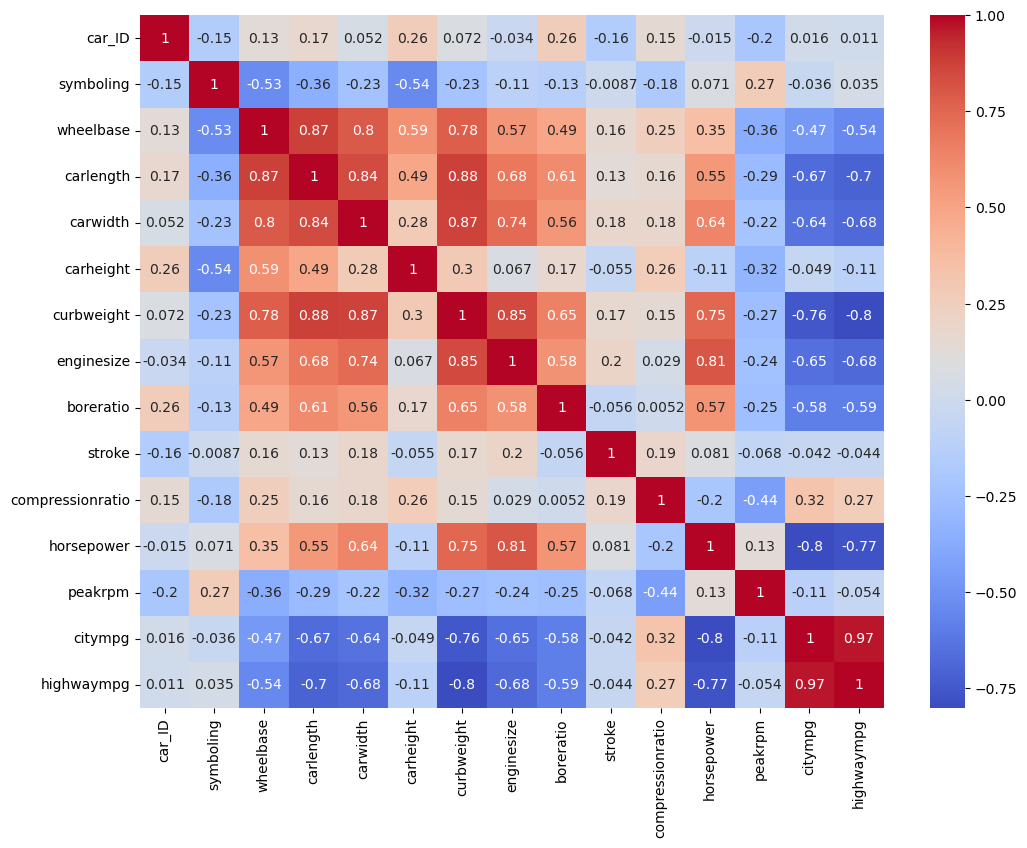

In [11]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

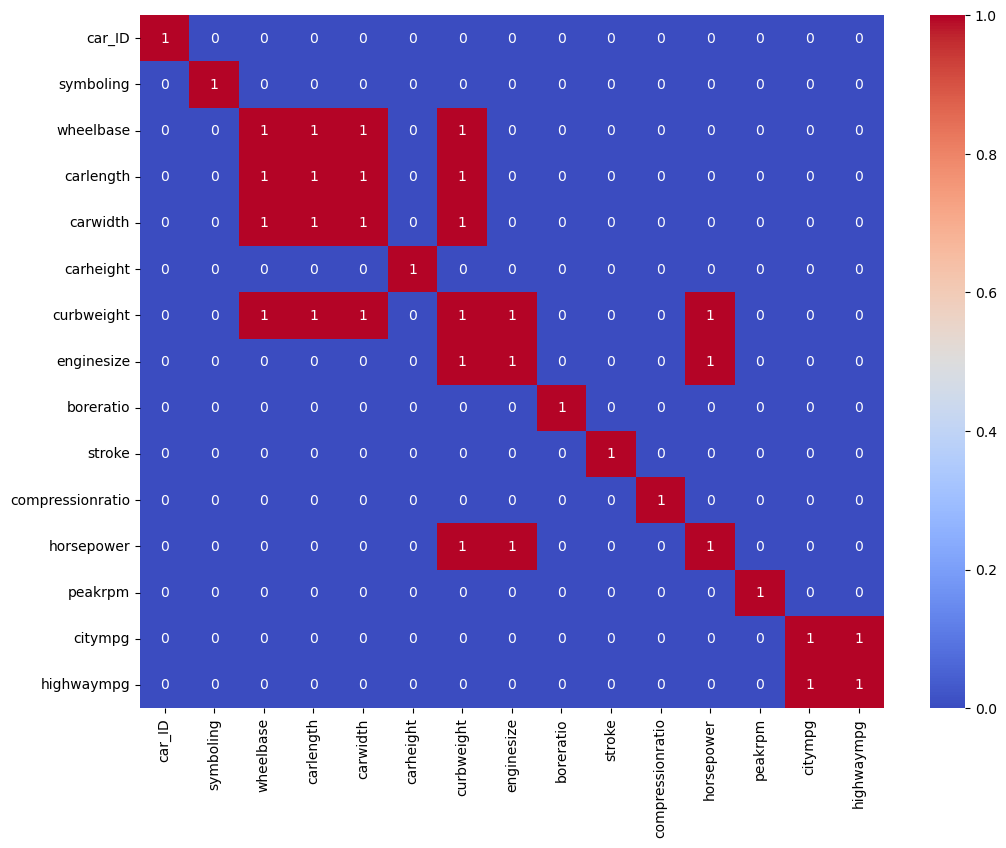

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

### Feature - Feature

wheelbase - carlength --> 0.87

wheelbase - carwidth --> 0.8

wheelbase - curbweight --> 0.78

carlength - carwidth --> 0.84

carlength - curbweight --> 0.88

carwidth - curbweight --> 0.87

curbweight - enginesize --> 0.85

enginesize - horsepower --> 0.81

citympg - highwaympg --> 0.85

#### cols weakly realated to target column
peakrpm

stroke

compressionratio

carheight
#### cols storngly related to other cols
wheelbase

carlength

carwidth

curbweight

enginesize

horsepower

citympg

highwaympg

In [15]:
df.drop(columns=['peakrpm','stroke','compressionratio','carheight','wheelbase','carlength'])

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = numeric_df.drop(columns=["price"])   
y = numeric_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r=r2_score(y_test,y_pred)
print("R2 Score: ",r)

R2 Score:  0.851665712636322


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)
print("Ridge R2:", r2_score(y_test, y_pred))


Ridge R2: 0.8541579757800357


In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
print("Lasso R2:", r2_score(y_test, y_pred))


Lasso R2: 0.8516664897948102


In [28]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define alphas FIRST
alphas = np.arange(1, 50, 0.05)

# Feature scaling (important for Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Cross Validation
model = RidgeCV(alphas=alphas)

# Train model
model.fit(X_train_scaled, y_train)

# Best alpha
print("Best alpha:", model.alpha_)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))



Best alpha: 12.30000000000001
Train R2: 0.8589335655599784
Test R2: 0.8504786808044629
Test MSE: 11803814.144526439


In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define alphas FIRST
alphas = np.arange(1, 50, 0.05)

# Feature scaling (important for Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Cross Validation
model = LassoCV(alphas=alphas)

# Train model
model.fit(X_train_scaled, y_train)

# Best alpha
print("Best alpha:", model.alpha_)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

Best alpha: 49.700000000000045
Train R2: 0.8624930750343195
Test R2: 0.8518634000222987
Test MSE: 11694498.841681153
best score:  0.8518634000222987
